# Curso de Visão Computacional

## Aula 1 - Entendendo o problema

### Preparando o ambiente

Para o curso de visão computacional, vamos utilizar a biblioteca OpenCV e a interface pytesseract, que interage com o Tesseract da Google. Para instalar o OpenCV, basta executar o comando abaixo:

```bash
pip install opencv-python
```
Para instalar o pytesseract, basta executar o comando abaixo:

```bash
pip install pytesseract
```


### Exemplo de uso

Vamos utilizar o pytesseract para extrair o texto de uma imagem. Para isso, vamos utilizar a imagem abaixo:

![Trecho do livro "The Witcher"](imagens/trecho_livro.png)

In [75]:
# Importando as bibliotecas necessárias
import os

import cv2
import matplotlib.pyplot as plt
import pytesseract

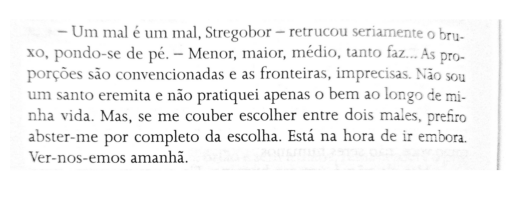

In [76]:
# Carregando a imagem
image_file_path = os.getcwd() + '/imagens/trecho_livro.png'
image = cv2.imread(image_file_path)
# Exibindo a imagem
# cv2.imshow('image', image)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)
plt.axis('off')  # It helps when Turn off axes to remove the axis ticks and labels
plt.show()

Com o Tesseract é possível extrair o texto da imagem. Para isso, vamos utilizar o método `image_to_string` do pytesseract. O código abaixo extrai o texto da imagem e imprime na tela.

In [77]:
texto = pytesseract.image_to_string(image)
print(texto)

— Um mal é um mal, Stregobor — retrucou seriamente 0 bry.
xo, pondo-se de pé. — Menor, maior, meédio, tanto faz... A
porgdes sao convencionadas e as fronteiras, imprecisas.
um santo eremita e nao pratiquei apenas 0 bem ao longo de mi-
nha vida. Mas, se me couber escolher entre dois males, prefiro

abster-me por completo da escolha. Esta na hora de ir embora.
Ver-nos-emos amanha.

5 pro-

40 SOU



Através do output acima podemos perceber que o Tesseract não extraiu de maneira tão eficiente o texto da imagem. Para melhorarmos a sua eficiência podemos passar alguns parâmetros para o método `image_to_string`:

1. `tessdata-dir`: Diretório onde estão os arquivos de treinamento do Tesseract.
2. `psm`: Modo de segmentação de página. O valor 6 é utilizado para segmentação de bloco de texto.

In [78]:
tesseract_config = "--tessdata-dir tessdata --psm 6"

texto = pytesseract.image_to_string(image, config=tesseract_config, lang="por")
print(texto)

— Um mal é um mal, Stregobor — retrucou seriamente o bry-
xo, pondo-se de pé. — Menor, maior, médio, tanto faz... Às pro-
porções são convencionadas e as fronteiras, imprecisas. Não sou
um santo eremita e não pratiquei apenas o bem ao longo de mi-
nha vida. Mas, se me couber escolher entre dois males, prefiro
abster-me por completo da escolha. Está na hora de ir embora. |
Ver-nos-emos amanhã. |


### Trabalhando com placas de veículos

Vamos utilizar o pytesseract para extrair o texto de uma placa de veículo. Para isso, vamos utilizar a imagem abaixo:

![Placa de veículo](imagens/placa_carro1.png)

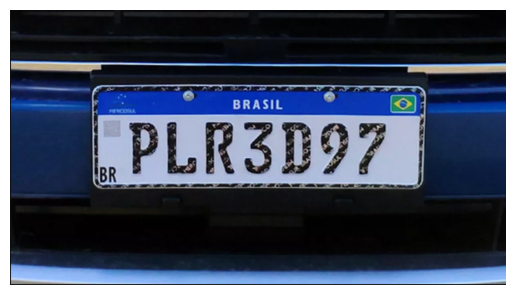

In [79]:
# Lendo a imagem
image_file_path = os.getcwd() + '/imagens/placa_carro1.png'
image = cv2.imread(image_file_path)

# Exibindo a imagem
# cv2.imshow('image', image)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)
plt.axis('off')  # It helps when Turn off axes to remove the axis ticks and labels
plt.show()

Antes de extrairmos o texto da imagem, precisamos realizar algumas operações de pré-processamento. Primeiramente, vamos converter a imagem para escala de cinza:

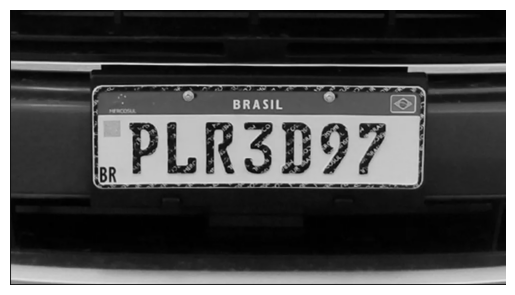

In [80]:
# Convertendo a imagem para escala de cinza
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Exibindo a imagem em escala de cinza
# cv2.imshow('gray_image', gray_image)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

gray_image = cv2.cvtColor(gray_image, cv2.COLOR_BGR2RGB)
plt.imshow(gray_image)
plt.axis('off')  # It helps when Turn off axes to remove the axis ticks and labels
plt.show()

In [81]:
tesseract_config = "--tessdata-dir tessdata"
texto = pytesseract.image_to_string(gray_image, config=tesseract_config, lang="por")

print(texto)

Ao rodarmos a célula acima percebemos que o Tesseract não conseguiu extrair o texto da placa de veículo, ainda que a imagem esteja em escala de cinza. Vamos aplicar a limiarização na imagem para melhorar a extração do texto através do método `cv2.threshold`:

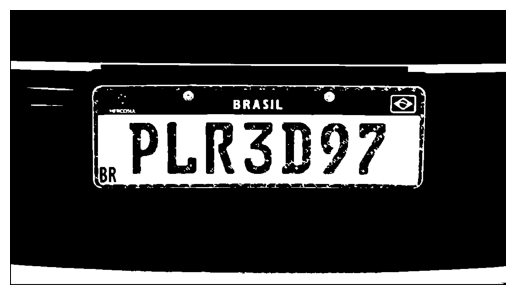

In [82]:
# Aplicando a limiarização
_, threshold_image = cv2.threshold(gray_image, 127, 255, cv2.THRESH_BINARY)

# Exibindo a imagem limiarizada
# cv2.imshow('threshold_image', threshold_image)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

threshold_image = cv2.cvtColor(threshold_image, cv2.COLOR_BGR2RGB)
plt.imshow(threshold_image)
plt.axis('off')  # It helps when Turn off axes to remove the axis ticks and labels
plt.show()

In [83]:
tesseract_config = "--tessdata-dir tessdata"
texto = pytesseract.image_to_string(threshold_image, config=tesseract_config, lang="por")

print(texto)